# Statistiques descriptives base de données

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Création PAnel et database

In [ ]:
df = pd.read_csv("cir_data.csv", sep=',')
print(df.columns)
print(df.shape)

annees=range(2021,2024)
nulle =[]
for year in annees:
    nulle.append(f'brevets{year}')
    nulle.append(f'CIR{year}')

df= df.drop(df[nulle], axis=1)
print(df.columns)
print(f"quand j'enleve les années{df.shape}")

annees=range(2016,2021)
colonnes_CIR =[]
colonnes_brevets =[]
for year in annees:
    colonnes_CIR.append(f'CIR{year}')
    colonnes_brevets.append(f'brevets{year}')

# Étape 1 : Filtrer les entreprises n'ayant jamais reçu de CIR
df = df[df[colonnes_CIR].sum(axis=1) > 0]
print(f"on enleve celle sans CIR{df.shape}")
# Étape 1 bis : Filtrer les entreprises n'ayant jamais déposé de brevet
df = df[df[colonnes_brevets].sum(axis=1) > 0]
print(f"on enleve celle sans CIR et sans brevet{df.shape}")

# Étape 2 : Filtrer les entreprises avec des "dents de scie"
# Critère : Pas d'années de CIR avec 0 entre deux années avec CIR non nul
def sans_dents_de_scie(row):
    cir_values = row[colonnes_CIR].values
    indices_non_nuls = [i for i, value in enumerate(cir_values) if value > 0]
    # Vérifie qu'il n'y a pas de 0 entre les années où CIR est non nul
    return indices_non_nuls == list(range(min(indices_non_nuls), max(indices_non_nuls) + 1))

df = df[df.apply(sans_dents_de_scie, axis=1)]

# Afficher la forme du DataFrame après filtrage
print(f"on enleve celle sans CIR et sans dents de scie{df.shape}")
df.to_csv("database218.csv", index=False)

Index(['siren', 'brevets2016', 'brevets2017', 'brevets2018', 'brevets2019',
       'brevets2020', 'brevets2021', 'brevets2022', 'brevets2023',
       'brevets2024', 'Famille ID', 'Année de Dépôt', 'Unnamed: 0', 'CIR2016',
       'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020', 'CIR2021', 'CIR2022',
       'CIR2023', 'activitePrincipaleUniteLegale', 'categorieEntreprise',
       'dateCreationUniteLegale', 'division', 'somme_CIR'],
      dtype='object')
(2380, 26)
Index(['siren', 'brevets2016', 'brevets2017', 'brevets2018', 'brevets2019',
       'brevets2020', 'brevets2024', 'Famille ID', 'Année de Dépôt',
       'Unnamed: 0', 'CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020',
       'activitePrincipaleUniteLegale', 'categorieEntreprise',
       'dateCreationUniteLegale', 'division', 'somme_CIR'],
      dtype='object')
quand j'enleve les années(2380, 20)
on enleve celle sans CIR(1239, 20)
on enleve celle sans CIR et sans brevet(290, 20)
on enleve celle sans CIR et sans dents de scie(218, 

In [38]:
# Chargement du DataFrame
df = pd.read_csv("database218.csv")

# Liste des colonnes de brevets (2016 à 2020)
brevets_columns = [f'brevets{year}' for year in range(2016, 2021)]

# Liste des colonnes CIR (2016 à 2020)
cir_columns = [f'CIR{year}' for year in range(2016, 2021)]

# Transformation du DataFrame en panel (format long) avec la fonction melt pour les brevets
df_brevets_panel = pd.melt(df, id_vars=['siren', 'division', 'dateCreationUniteLegale'], 
                   value_vars=brevets_columns, 
                   var_name='annee', value_name='brevets')

# Transformation du DataFrame en panel (format long) avec la fonction melt pour les CIR
df_CIR_panel = pd.melt(df, id_vars=['siren', 'division', 'dateCreationUniteLegale'], 
                       value_vars=cir_columns, 
                       var_name='annee', value_name='CIR')

# Nettoyage des colonnes d'année dans les deux panels
df_brevets_panel['annee'] = df_brevets_panel['annee'].apply(lambda x: x.replace('brevets', ''))
df_CIR_panel['annee'] = df_CIR_panel['annee'].apply(lambda x: x.replace('CIR', ''))

# Fusion des deux panels pour avoir à la fois les informations sur les brevets et le CIR
df_panel = pd.merge(df_brevets_panel, df_CIR_panel, on=['siren', 'division', 'dateCreationUniteLegale', 'annee'], how='left')

# Ajout de la colonne 'idEti' basée sur la colonne 'categorieEntreprise' (avec 1 pour ETI, 0 pour GE)
# Assurez-vous que la colonne 'categorieEntreprise' contient des valeurs comme 'ETI' ou 'GE'
df['idEti'] = df['categorieEntreprise'].apply(lambda x: 1 if x == 1 else (0 if x == 0 else None))

# Ajout de la colonne 'idEti' au panel
df_panel = pd.merge(df_panel, df[['siren', 'idEti']], on='siren', how='left')

# Affichage du résultat
print(df_panel)

# Sauvegarde du panel dans un fichier CSV
df_panel.to_csv("panel_database218.csv", index=False)


          siren  division  dateCreationUniteLegale annee  brevets        CIR  \
0     300560588        20                     1900  2016      6.0        0.0   
1     302456199        62                     1985  2016      1.0  3439257.0   
2     304849094        71                     1982  2016      0.0  3228087.0   
3     305151409        21                     1900  2016      4.0  7946000.0   
4     306926684        26                     1976  2016      0.0        0.0   
...         ...       ...                      ...   ...      ...        ...   
1085  871500229        22                     1971  2020      1.0        0.0   
1086  897080289        26                     1970  2020      8.0  1632507.0   
1087  950020180        32                     1980  2020      0.0    68307.0   
1088  954506077        29                     1954  2020      0.0  5100000.0   
1089  957503642        32                     1957  2020      0.0        0.0   

      idEti  
0         1  
1         1

In [2]:
""" Création d'un dictionnaire de traduction des divisions NAF vers secteur"""

dic = pd.read_csv('naf2008_liste_n2.csv', sep=';')
dic.columns = ['NAF','secteur']
#print(dic.columns)
dictionnaire_division = dict(zip(dic['NAF'], dic['secteur']))
#print(dictionnaire_division)

# Nombres d'entrerpises (totale, CIR et brevets) en fonction des secteurs et des catégories juridiques
Je recherche dans cette partie à regarder dans quels secteurs sont mes entreprises et si elles sont des ETI ou des GE

C:\Users\lucie\AppData\Local\Temp\ipykernel_18872\892447081.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


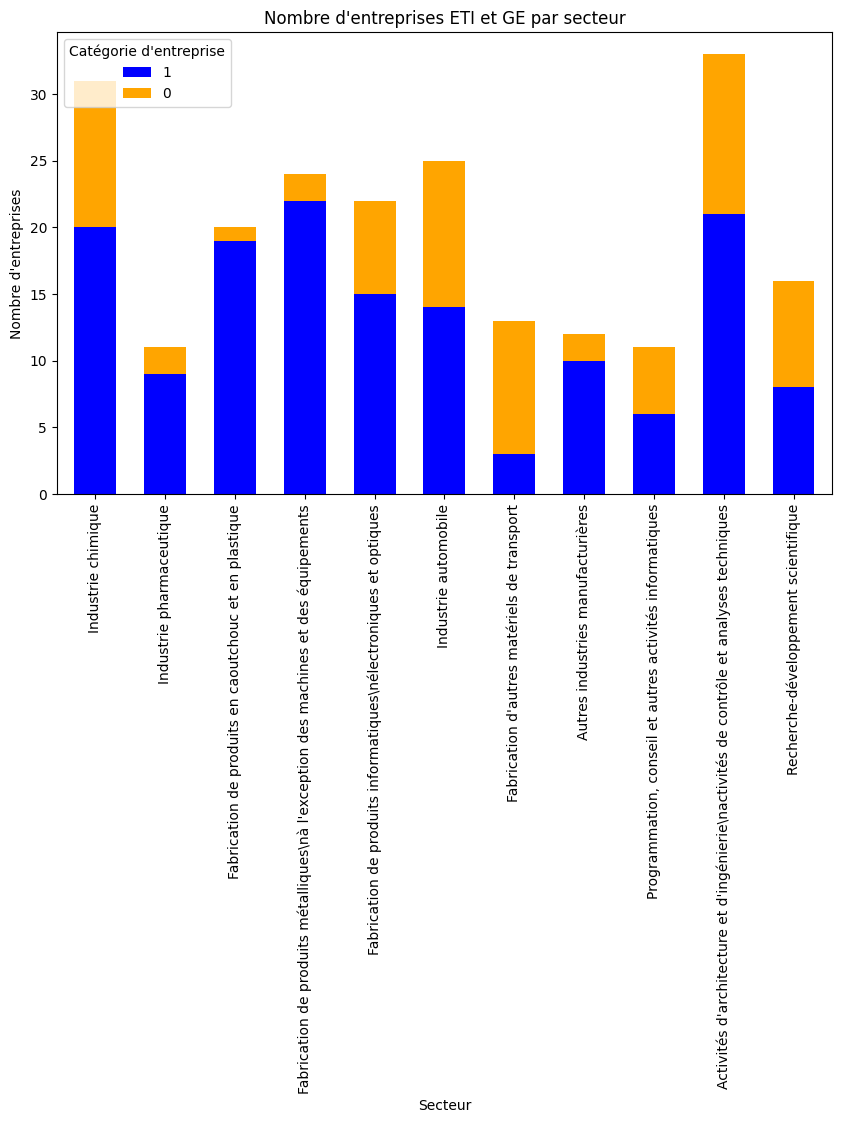

In [3]:
""" Nombre d'entreprise(total, ETI, GE) en fonction des secteurs """

df['division'] = df['division'].astype(str)

# Groupement par secteur et catégorie d'entreprise (ETI ou GE)
df_grouped = df.groupby(['division', 'categorieEntreprise']).size().unstack(fill_value=0)

# Ajouter une colonne 'Total' pour le nombre total par secteur
df_grouped['Total'] = df_grouped.sum(axis=1)

# Renommer les divisions en utilisant le dictionnaire
df_grouped = df_grouped.rename(index=dictionnaire_division)

# Tracer le graphique avec des barres empilées et plus épaisses
ax = df_grouped[[1, 0]].plot(kind='bar', stacked=True, figsize=(10, 6), width=0.6, color=['blue', 'orange'])

# Ajouter un titre et des labels
plt.title('Nombre d\'entreprises ETI et GE par secteur')
plt.xlabel('Secteur')
plt.ylabel('Nombre d\'entreprises')

# Afficher la légende
plt.legend(title='Catégorie d\'entreprise', loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()



C:\Users\lucie\AppData\Local\Temp\ipykernel_18872\2135138004.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


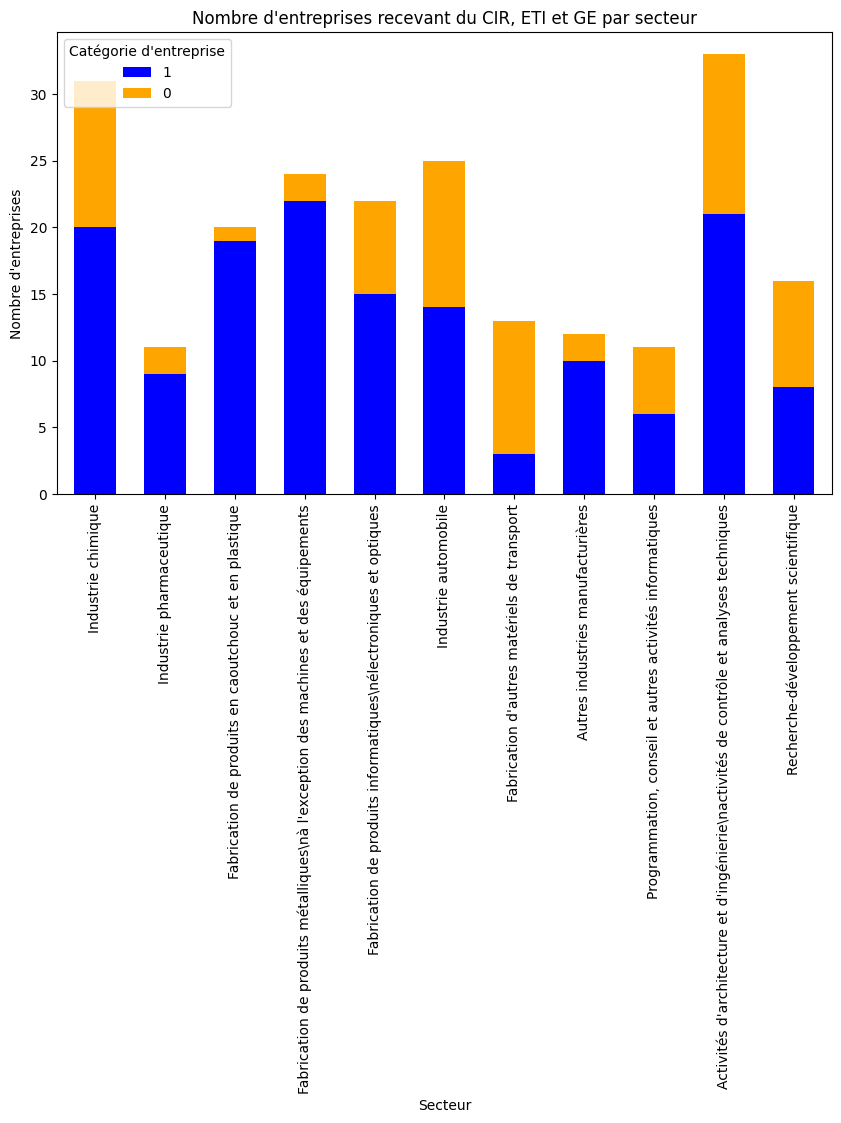

In [4]:
""" Nombre d'entreprise recevant au moins une fois du CIR en fonction des secteurs et catégorie d'entreprise"""

df[['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020']] = df[['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020']].apply(pd.to_numeric, errors='coerce')
df_cir = df[(df[['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020']] > 0).any(axis=1)]
# Assurez-vous que les colonnes nécessaires existent dans votre dataframe
df_cir['division'] = df_cir['division'].astype(str)
# Groupement par secteur et catégorie d'entreprise (ETI ou GE)
df_grouped = df_cir.groupby(['division', 'categorieEntreprise']).size().unstack(fill_value=0)

# Ajouter une colonne 'Total' pour le nombre total par secteur
df_grouped['Total'] = df_grouped.sum(axis=1)

# Renommer les divisions en utilisant le dictionnaire
df_grouped = df_grouped.rename(index=dictionnaire_division)

# Tracer le graphique

ax = df_grouped[[1, 0]].plot(kind='bar', stacked=True, figsize=(10, 6), width=0.6, color=['blue', 'orange'])

# Ajouter un titre et des labels
plt.title('Nombre d\'entreprises recevant du CIR, ETI et GE par secteur')
plt.xlabel('Secteur')
plt.ylabel('Nombre d\'entreprises')

# Afficher la légende
plt.legend(title='Catégorie d\'entreprise', loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\lucie\AppData\Local\Temp\ipykernel_18872\3580300177.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


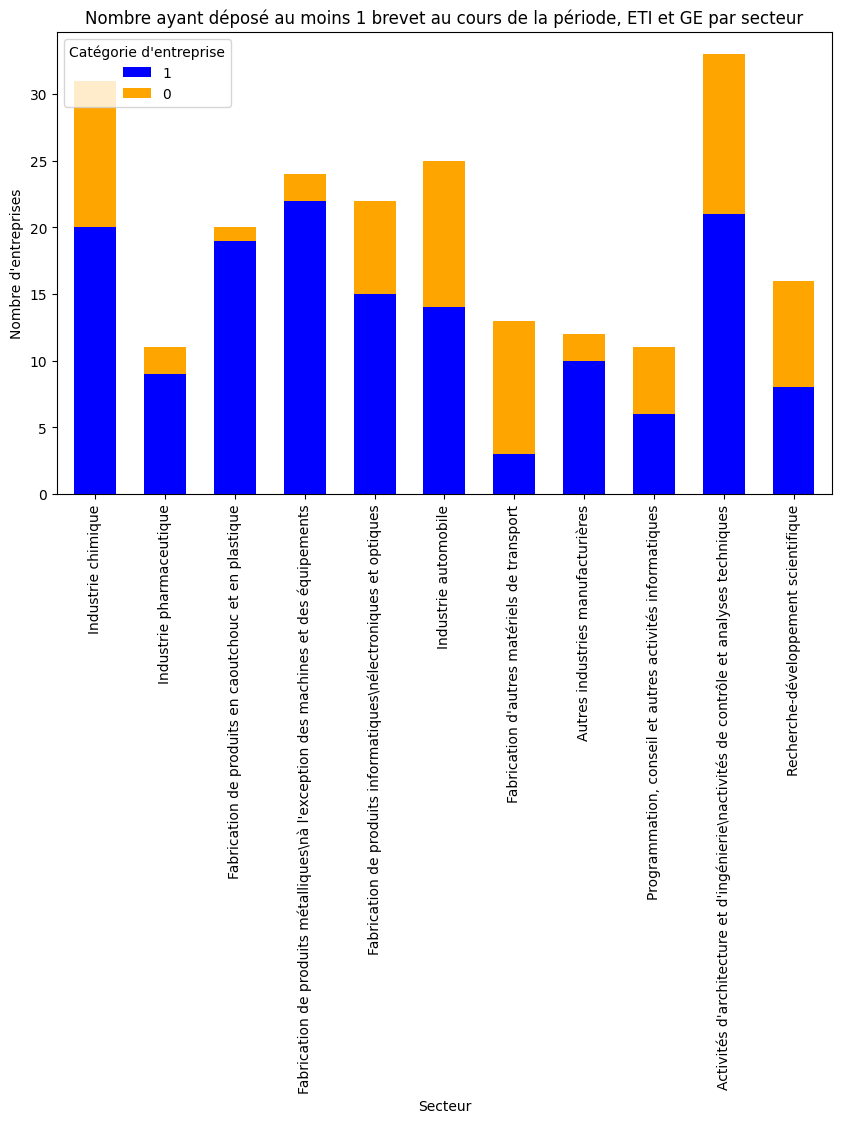

In [5]:
""" Nombre d'entreprise déposant au moins un brevet durant la période en fonction des secteurs et catégorie d'entreprise"""

df_cir = df[(df[['brevets2016', 'brevets2017', 'brevets2018', 'brevets2019', 'brevets2020']] > 0).any(axis=1)]
# Assurez-vous que les colonnes nécessaires existent dans votre dataframe
df_cir['division'] = df_cir['division'].astype(str)
# Groupement par secteur et catégorie d'entreprise (ETI ou GE)
df_grouped = df_cir.groupby(['division', 'categorieEntreprise']).size().unstack(fill_value=0)

# Ajouter une colonne 'Total' pour le nombre total par secteur
df_grouped['Total'] = df_grouped.sum(axis=1)

# Renommer les divisions en utilisant le dictionnaire
df_grouped = df_grouped.rename(index=dictionnaire_division)

# Tracer le graphique

ax = df_grouped[[1, 0]].plot(kind='bar', stacked=True, figsize=(10, 6), width=0.6, color=['blue', 'orange'])
# Ajouter un titre et des labels
plt.title('Nombre ayant déposé au moins 1 brevet au cours de la période, ETI et GE par secteur')
plt.xlabel('Secteur')
plt.ylabel('Nombre d\'entreprises')

# Afficher la légende
plt.legend(title='Catégorie d\'entreprise', loc='upper left')

# Afficher le graphique
plt.tight_layout()
plt.show()

# Proportion des secteurs en totale, recevant du CIR, déposant des brevets
Certains secteurs sont ils sureprésentés ? 

C:\Users\lucie\AppData\Local\Temp\ipykernel_18872\1447989269.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Pour éviter que la légende dépasse du graphique


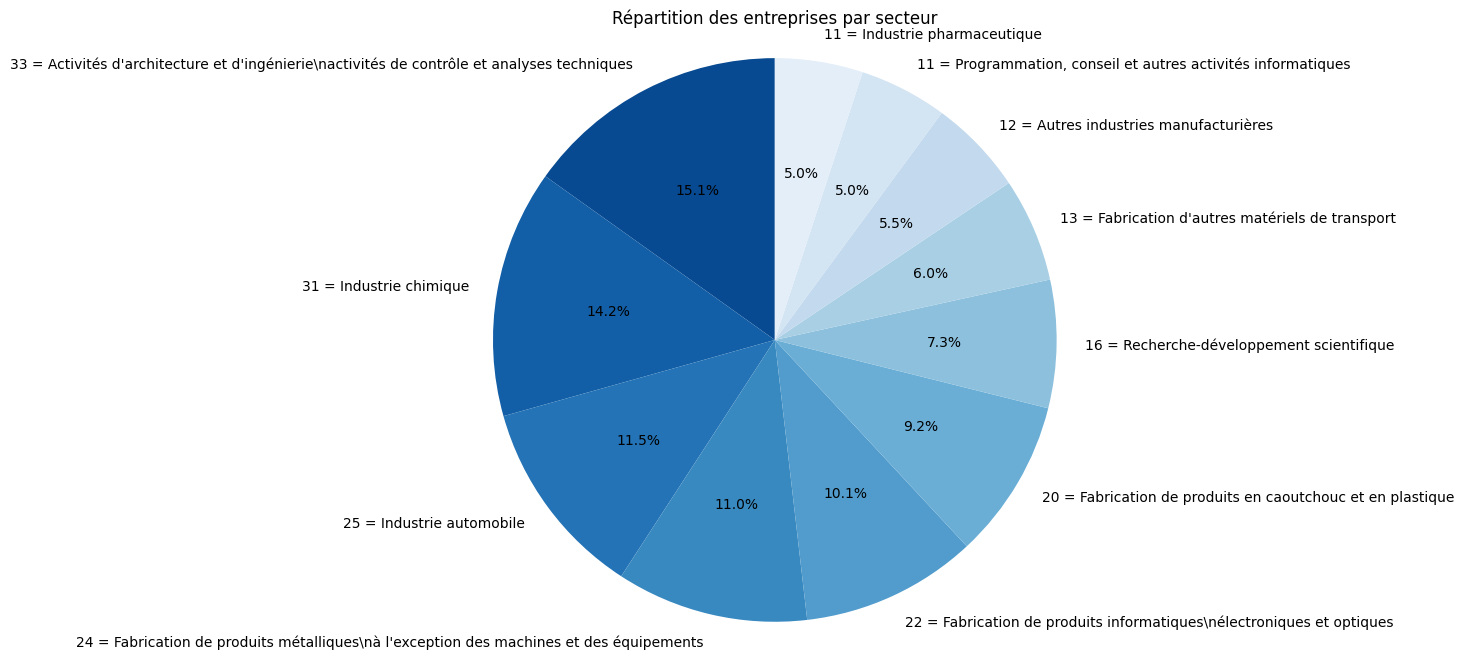

In [6]:
""" Part des secteurs en nombres d'entreprise"""
# Groupement par secteur (compter le nombre d'entreprises dans chaque secteur)
secteur_counts = df['division'].value_counts()

colors= plt.cm.Blues(np.linspace(0.9, 0.1, len(df['division'].unique())))
# Créer le graphique circulaire
plt.figure(figsize=(8, 8))

# Utiliser les secteurs et crée

plt.pie(secteur_counts, 
        labels=[f"{count} = {dictionnaire_division.get(str(code), 'Inconnu')}" 
                for code, count in secteur_counts.items()],
        autopct='%1.1f%%',  # Afficher tous les pourcentages
        startangle=90, colors=colors)

# Ajouter un titre
plt.title('Répartition des entreprises par secteur')

# Ajouter une légende à droite du graphique
# Utilisation de bbox_to_anchor pour positionner la légende à droite

# Afficher le graphique
plt.axis('equal')  # Assurer que le graphique soit circulaire
plt.tight_layout()  # Pour éviter que la légende dépasse du graphique
plt.show()

C:\Users\lucie\AppData\Local\Temp\ipykernel_18872\4172087973.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


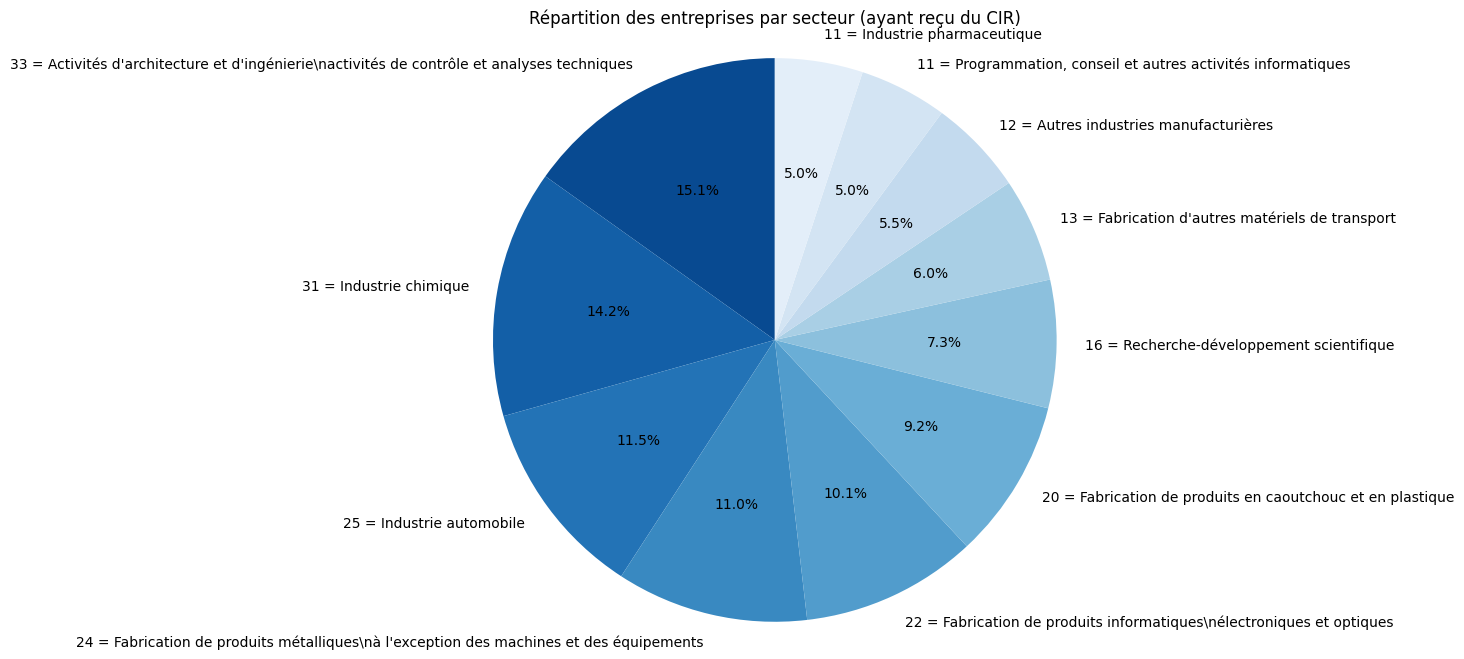

In [7]:
""" Part des secteurs en nombres d'entreprise recevant du CIR"""


# Filtrer pour ne garder que les entreprises ayant reçu du CIR au moins une fois
df_cir = df[(df[['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020']] > 0).any(axis=1)]

# Compter le nombre d'entreprises dans chaque secteur pour les entreprises ayant reçu du CIR
secteur_counts_cir = df_cir['division'].value_counts()

# Créer le graphique circulaire
plt.figure(figsize=(8, 8))

# Utiliser les secteurs et créer le pie chart
plt.pie(secteur_counts_cir, 
        labels=[f"{count} = {dictionnaire_division.get(str(code), 'Inconnu')}" 
                for code, count in secteur_counts_cir.items()],
        autopct='%1.1f%%',  # Afficher tous les pourcentages
        startangle=90, colors=colors)

# Ajouter un titre
plt.title('Répartition des entreprises par secteur (ayant reçu du CIR)')

# Assurer que le graphique soit circulaire et bien positionné
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\lucie\AppData\Local\Temp\ipykernel_18872\673241459.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


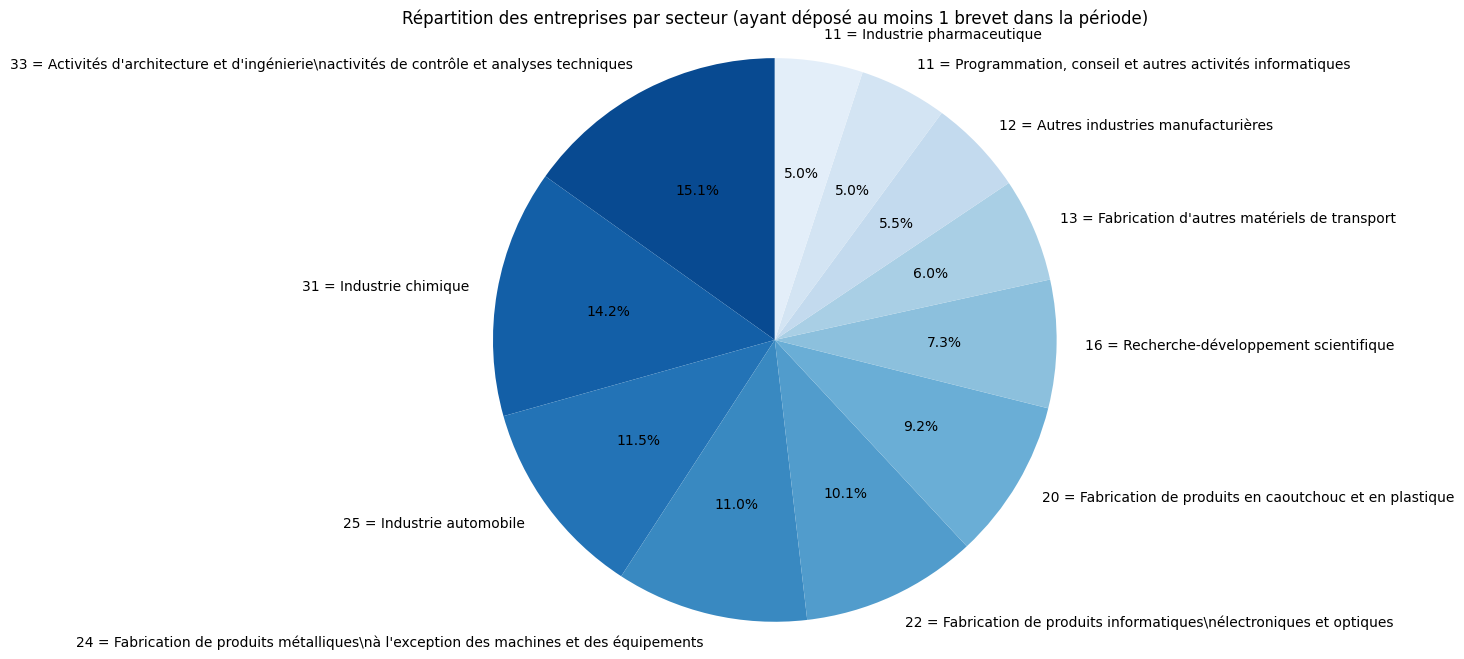

['20' '62' '71' '21' '26' '22' '29' '25' '72' '32' '30']


In [8]:
""" Part des secteurs en nombres d'entreprise ayant déposé au moins brevets"""

# Filtrer pour ne garder que les entreprises ayant reçu du CIR au moins une fois
df_cir = df[(df[['brevets2016', 'brevets2017', 'brevets2018', 'brevets2019', 'brevets2020']] > 0).any(axis=1)]

# Compter le nombre d'entreprises dans chaque secteur pour les entreprises ayant reçu du CIR
secteur_counts_cir = df_cir['division'].value_counts()

# Créer le graphique circulaire
plt.figure(figsize=(8, 8))

# Utiliser les secteurs et créer le pie chart
plt.pie(secteur_counts_cir, 
        labels=[f"{count} = {dictionnaire_division.get(str(code), 'Inconnu')}" 
                for code, count in secteur_counts_cir.items()],
        autopct='%1.1f%%',  # Afficher tous les pourcentages
        startangle=90,colors=colors)

# Ajouter un titre
plt.title('Répartition des entreprises par secteur (ayant déposé au moins 1 brevet dans la période)')

# Assurer que le graphique soit circulaire et bien positionné
plt.axis('equal')
plt.tight_layout()
plt.show()

# Filtrer les entreprises avec au moins un brevet égal à zéro sur toute la période
df_sans_brevets = df[(df[['brevets2016', 'brevets2017', 'brevets2018', 'brevets2019', 'brevets2020']] == 0).any(axis=1)]

# Extraire les secteurs associés à ces entreprises
secteurs_sans_brevets = df_sans_brevets['division'].unique()

# Afficher la liste des secteurs
print(secteurs_sans_brevets)

# Etude brevet et CIR pour les entreprises du dataframe
Je représente dans cette partie pour chaque année :
- nombre d'ETI ayant reçu du CIR
- nombre de GE ayant reçu du CIR
- nombre d'entreprise ayant déposé un brevet
- moyenne du nombre de brevet ayant déposé plus que zéro brevet

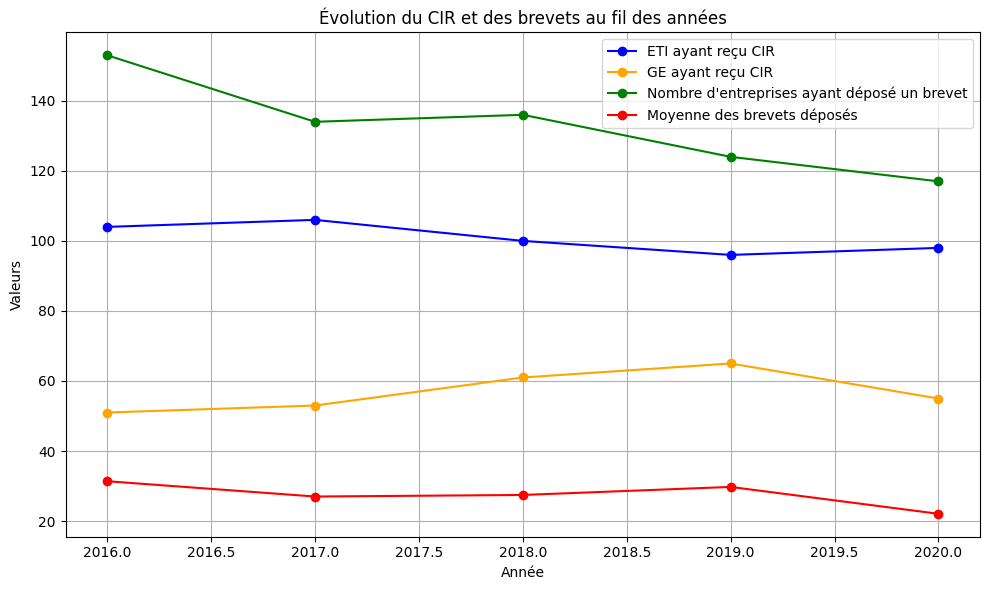

In [9]:
# Liste des années à traiter
annees = [2016, 2017, 2018, 2019, 2020]

# Initialisation des listes pour stocker les données
eti_cir = []
ge_cir = []
brevets = []
moyenne_brevets = []

# Boucle sur chaque année pour collecter les données
for annee in annees:
    # Filtrer les entreprises ayant reçu un CIR > 0
    cir_col = f'CIR{annee}'
    brevets_col = f'brevets{annee}'
    
    df_cir = df[df[cir_col] > 0]
    df_brevets = df[df[brevets_col] > 0]
    
    # Séparer les entreprises par catégorie
    df_cir_eti = df_cir[df_cir['categorieEntreprise'] == 1]
    df_cir_ge = df_cir[df_cir['categorieEntreprise'] == 0]
    
    # Calcul des valeurs pour chaque année
    nombre_cir_eti = df_cir_eti.shape[0]  # Nombre d'ETI ayant reçu du CIR
    nombre_cir_ge = df_cir_ge.shape[0]    # Nombre de GE ayant reçu du CIR
    nombre_brevets = df_brevets.shape[0]  # Nombre d'entreprises ayant déposé un brevet
    moyenne_brevets_val = df_brevets[brevets_col].mean() if not df_brevets.empty else 0  # Moyenne des brevets
    
    # Ajouter les données aux listes
    eti_cir.append(nombre_cir_eti)
    ge_cir.append(nombre_cir_ge)
    brevets.append(nombre_brevets)
    moyenne_brevets.append(moyenne_brevets_val)

# Créer le graphique
plt.figure(figsize=(10, 6))

# Tracer les courbes
plt.plot(annees, eti_cir, label="ETI ayant reçu CIR", color='blue', marker='o')
plt.plot(annees, ge_cir, label="GE ayant reçu CIR", color='orange', marker='o')
plt.plot(annees, brevets, label="Nombre d'entreprises ayant déposé un brevet", color='green', marker='o')
plt.plot(annees, moyenne_brevets, label="Moyenne des brevets déposés", color='red', marker='o')

# Ajouter des légendes, titre et labels
plt.title("Évolution du CIR et des brevets au fil des années")
plt.xlabel("Année")
plt.ylabel("Valeurs")
plt.legend()
plt.grid(True)

# Ajuster l'affichage
plt.tight_layout()
plt.show()

# Variance et Etalement des données
On regarde boite à moustache des valeurs de CIR et de brevets sur toutes les années sans distincition de catégories et de secteurs pour les entreprises. 

C:\Users\lucie\AppData\Local\Temp\ipykernel_18872\1469336538.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(annees)
C:\Users\lucie\AppData\Local\Temp\ipykernel_18872\1469336538.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(annees)


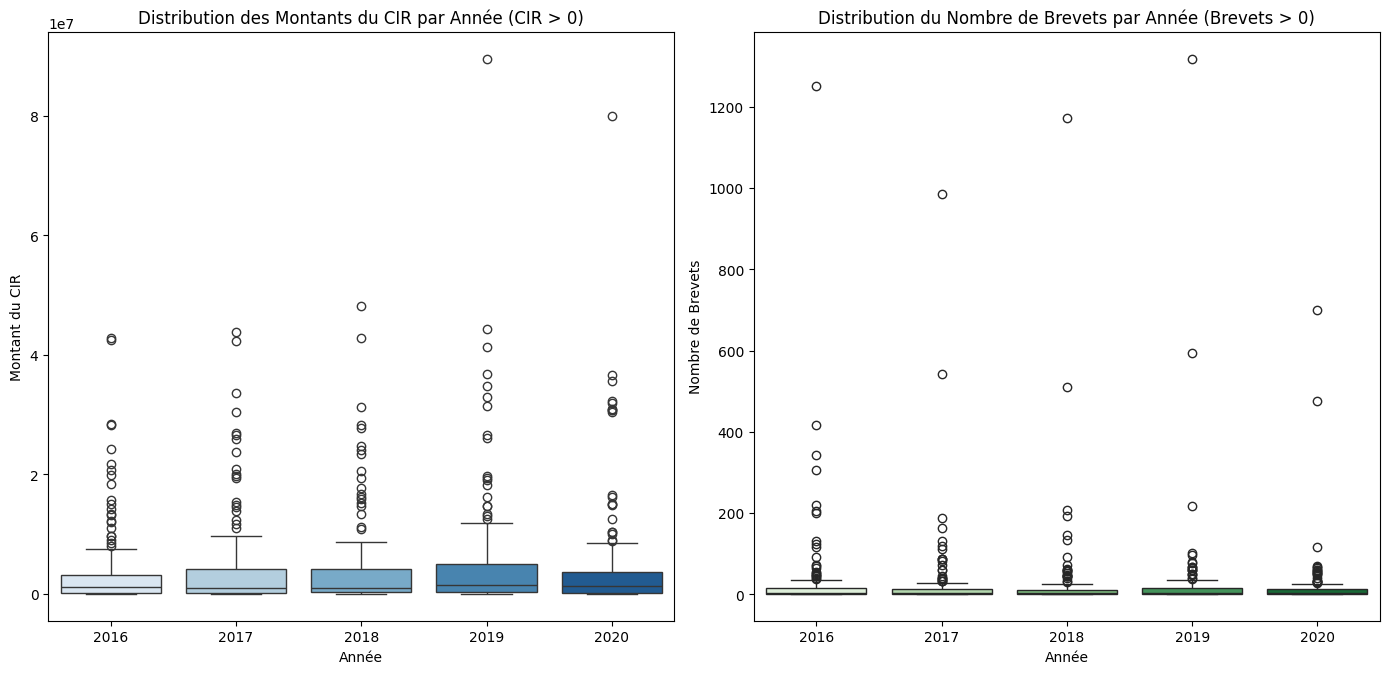

In [12]:
# Préparer les données pour les boxplots
# Créer des listes vides pour chaque année
montants_cir = []
nombres_brevets = []

for annee in annees:
    # Créer les colonnes de CIR et de brevets pour chaque année
    cir_col = f'CIR{annee}'
    brevets_col = f'brevets{annee}'

    # Ajouter les montants CIR (en excluant ceux égaux à 0) et les nombres de brevets (en excluant ceux égaux à 0) pour chaque année
    montants_cir.append(df[df[cir_col] > 100][cir_col].dropna())  # Exclure CIR = 0 et supprimer les NaN
    nombres_brevets.append(df[df[brevets_col] > 0][brevets_col].dropna())  # Exclure Brevets = 0 et supprimer les NaN

# Initialisation de la figure
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Graphique 1 : Boxplot des montants de CIR (en excluant les CIR = 0)
sns.boxplot(data=montants_cir, ax=axes[0], palette="Blues")
axes[0].set_xticklabels(annees)
axes[0].set_title('Distribution des Montants du CIR par Année (CIR > 0)')
axes[0].set_xlabel('Année')
axes[0].set_ylabel('Montant du CIR')


# Graphique 2 : Boxplot des nombres de brevets (en excluant les Brevets = 0)
sns.boxplot(data=nombres_brevets, ax=axes[1], palette="Greens")
axes[1].set_xticklabels(annees)
axes[1].set_title('Distribution du Nombre de Brevets par Année (Brevets > 0)')
axes[1].set_xlabel('Année')
axes[1].set_ylabel('Nombre de Brevets')



# Ajuster l'affichage des graphiques
plt.tight_layout()
plt.show()


Maintenant je regarde les étalement des valeurs de CIR reçu en fonction de la catégorie des entreprises sans distinction d'années.

In [11]:
# Transformer les données en format long
df_long = df.melt(id_vars=['siren', 'categorieEntreprise'], 
                  value_vars=['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020'],
                  var_name='Année', 
                  value_name='Montant_CIR')

# Filtrer pour exclure les valeurs de CIR égales à 0 ou manquantes si nécessaire
df_long = df_long[df_long['Montant_CIR'] > 100]
df_long = df_long[df_long['brevets'] < 1000]
df_long = df_long[df_long['brevets'] >0]
# Création du boxplot pour les montants de CIR, séparé par catégorie d'entreprise (ETI et GE)
plt.figure(figsize=(8, 6))
df_long.boxplot(column='Montant_CIR', by='categorieEntreprise', grid=False)

# Ajustement de l'affichage
plt.title("Répartition des montants de CIR reçus par catégorie d'entreprise (ETI vs GE)")
plt.suptitle("")  # Supprimer le titre par défaut de la fonction `boxplot`
plt.xlabel("Catégorie d'entreprise")
plt.ylabel("Montant de CIR")

plt.yscale('log')  # Utiliser une échelle logarithmique si les valeurs varient beaucoup
plt.tight_layout()
plt.show()

KeyError: 'brevets'

Distribution relativement similaires entre ETI et GE, un peu moins de CIR reçu pour le 3e quartiles des ETI et à la place beaucoup de outliers.

In [ ]:
"""Etude des outliers"""
# Calcul des quartiles et de l'IQR
Q1 = df_long['Montant_CIR'].quantile(0.25)
Q3 = df_long['Montant_CIR'].quantile(0.75)
IQR = Q3 - Q1

# Définir les moustaches
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = df_long[(df_long['Montant_CIR'] < lower_bound) | (df_long['Montant_CIR'] > upper_bound)]

# Afficher les outliers (avec le siren et l'année associés)
print("Outliers détectés :")
print(outliers[['siren', 'Année', 'Montant_CIR']])

# Première visualisation de corrélation

In [ ]:

# Filtrer les entreprises qui ont un CIR entre 0 et 1000 dans n'importe quelle année
cir_columns = ['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020']
df_filtered = df[~df[cir_columns].apply(lambda row: ((row > 0) & (row < 100)).any(), axis=1)]

# Calculer le CIR total sur la période 2016-2023 pour les entreprises restantes
df_filtered['CIR_total'] = df_filtered[cir_columns].sum(axis=1)

# Calculer le nombre total de brevets sur la période 2016-2023 pour les entreprises restantes
brevets_columns = ['brevets2016', 'brevets2017', 'brevets2018', 'brevets2019', 'brevets2020']
df_filtered['brevets_total'] = df_filtered[brevets_columns].sum(axis=1)

# Filtrer les entreprises avec un CIR total > 1000 et des brevets > 0
df_filtered = df_filtered[(df_filtered['brevets_total'] <1000)]
df_filtered = df_filtered[(df_filtered['brevets_total'] >0)]
print(f"en épurant les données, nous obtenons {df_filtered.shape[0]} entreprises")

# Créer les listes pour les axes
montants_cir = df_filtered['CIR_total'].values
nombres_brevets = df_filtered['brevets_total'].values

# Convertir en tableau numpy pour faciliter l'indexation
x = np.array(montants_cir)
y = np.array(nombres_brevets)

# Calculer la densité avec KDE (Kernel Density Estimation)
kde = gaussian_kde([x, y])

# Créer une grille de points pour calculer la densité
x_grid = np.linspace(min(x), max(x), 100)
y_grid = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = kde([X.flatten(), Y.flatten()]).reshape(X.shape)

# Créer un graphique de contours
plt.figure(figsize=(10, 8))
cp = plt.contourf(X, Y, Z, levels=20, cmap='Blues')

# Ajouter des étiquettes pour les axes
plt.xlabel('Montant Total du CIR (2016-2020)')
plt.ylabel('Nombre Total de Brevets (2016-2020)')

# Ajouter un titre
plt.title('Densité des Entreprises : CIR Total vs Nombre Total de Brevets')
plt.ylim(0,100)
plt.xlim(0,0.4*1e8)
# Afficher la barre de couleur
plt.colorbar(cp, label='Densité des Entreprises')
# Affichage
plt.tight_layout()
plt.show()

In [ ]:
# Définir les variables indépendantes (X) et dépendantes (y)
X = df_filtered['brevets_total']
y = df_filtered['CIR_total']

# Ajouter une constante (terme d'interception) à X
X = sm.add_constant(X)

# Créer le modèle de régression linéaire
model = sm.OLS(y, X)

# Ajuster le modèle
results = model.fit()

# Afficher les résultats
print(results.summary())

In [ ]:

# Visualisation avec un graphique
plt.figure(figsize=(10, 6))

# Tracer les points de données réels
plt.scatter(x,y, color='blue', label='Données réelles')

# Ajouter des labels et un titre
plt.xlabel('Nombre de brevets déposés')
plt.ylabel('Montant total du CIR')
plt.title('Régression linéaire : CIR vs Nombre de brevets déposés')
plt.xlim(0,100)
plt.ylim(0,0.5*1e8)
# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()
